In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import functions as proj

# Introduction: College Scorecard Data

This project looks at the [College Scorecard Data](https://collegescorecard.ed.gov/).

The data contain extensive information of every post-secondary institution of learning in the United States. 

While some of the fields in the dataset are easily understood upon reading the data dictionary, there are two very important fields that describe *foundational attributes* of the college landscape in the US. In the dataset, these are:
1. `CONTROL`: The control-type of the institution. Whether the school is a publicly funded institution (like UCSD), a private non-profit institution (like Harvard), or a for-profit institution (like the University of Phoenix). For-profit institutions in particular have often been accused of financially taking advantage of their student-body.
2. `PREDDEG`: The predominant degree awarded at the institution. These are either (1) certificate programs, like trade schools, (2) 2-year associate degrees (awarded from junior colleges), (3) bachelor degree granting institutions, and (4) graduate degree granting institutions (excluded from our data).

In [5]:
college_path = os.path.join('data', 'MERGED2016_17_PP.csv')
college = pd.read_csv(college_path)
college.head()

,UNITID,OPEID,OPEID6,INSTNM,ZIP,CITY,STABBR,LATITUDE,LONGITUDE,INSTURL,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,35762,Normal,AL,34.783368,-86.568502,www.aamu.edu/,...,0.5774,NaN,0.309,NaN,0.7667,32750,348.16551225731,0.2531554273,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,35294-0110,Birmingham,AL,33.505697,-86.799345,www.uab.edu,...,0.8007,NaN,0.5178,NaN,0.5179,21833,232.106797835537,0.513963161,NaN,0.5384
2,100690,2503400,25034,Amridge University,36117-3553,Montgomery,AL,32.362609,-86.174010,www.amridgeuniversity.edu,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.8436,22890,243.343773299842,0.2307692308,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,35899,Huntsville,AL,34.724557,-86.640449,www.uah.edu,...,0.8161,NaN,0.5116,NaN,0.4312,22647,240.760438353933,0.5485090298,NaN,0.4905
4,100724,100500,1005,Alabama State University,36104-0271,Montgomery,AL,32.364317,-86.295677,www.alasu.edu,...,0.6138,NaN,0.5313,NaN,0.8113,31500,334.876752247489,0.2185867473,NaN,0.2475


# The Data Dictionary

First, we need to understand what is in the dataset. There is an excel file with a description of what's in the dataset. Open it *in Pandas* and take at its structure. 

The college scorecard is a very *wide* dataset; there are ~7000 schools, with over 100 columns. In the "full data" there are over 1000 columns. Being able to search and parse the data dictionary with Pandas is very necessary for working with the full data!

In [6]:
datadict_path = os.path.join('data', 'CollegeScorecardDataDictionary.xlsx')

datadict = pd.read_excel(datadict_path, sheet_name='data_dictionary')
datadict.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES
0,Unit ID for institution,root,id,integer,UNITID,NaN,NaN,IPEDS,Shown/used on consumer website.
1,8-digit OPE ID for institution,root,ope8_id,integer,OPEID,NaN,NaN,IPEDS,Shown/used on consumer website.
2,6-digit OPE ID for institution,root,ope6_id,integer,OPEID6,NaN,NaN,IPEDS,Shown/used on consumer website.
3,Institution name,school,name,autocomplete,INSTNM,NaN,NaN,IPEDS,Shown/used on consumer website.
4,City,school,city,autocomplete,CITY,NaN,NaN,IPEDS,Shown/used on consumer website.


As observed in homework 2, the college scorecard dataset has a number of 'integer-coded nominal fields'. Two of the most important codes are:
* `PREDDEG` is the "predominant degree type awarded" by the college, and
* `CONTROL` is the "control of the institution" (e.g. public school).

The mapping of integers ("value") to descriptions ("label") is given in the data-dictionary. We would like to replace the integers-codes in the `college` dataset with their string values to make it more readable for our visualization and analysis.

# College Scorecard EDA: Understanding the US college landscape

First we want to understand what the state of post-secondary education looks like in the US. We'd like to know things like:
1. How many schools are there? what types of institutions are they? where are they?
2. How many students attends these schools? What sort of institutions do most students attend?
3. What are these school teaching students? Do most students attend a trade school or a classic university?

In [7]:
basic_cols = proj.BASIC_COLS

In [8]:
college[basic_cols].head().T

,0,1,2,3,4
UNITID,100654,100663,100690,100706,100724
OPEID,100200,105200,2503400,105500,100500
OPEID6,1002,1052,25034,1055,1005
INSTNM,Alabama A & M University,University of Alabama at Birmingham,Amridge University,University of Alabama in Huntsville,Alabama State University
ZIP,35762,35294-0110,36117-3553,35899,36104-0271
LATITUDE,34.7834,33.5057,32.3626,34.7246,32.3643
LONGITUDE,-86.5685,-86.7993,-86.174,-86.6404,-86.2957
CONTROL,1,1,2,1,1
PREDDEG,3,3,3,3,3
UGDS,4616,12047,293,6346,4704


The dataset has a few identification numbers that are useful to understand:

- `UNITID` is the unique identifier for an organization or school name given by the Integrated Postsecondary Education Data System (IPEDS). It is a unique in this dataset (check this!)
- `OPEID` is the Office of Postsecondary Education Identification code. It is a unique identifier for a school and is unique in this dataset (check this!)
- `OPEID6` is the OPEID code *without the last two digits*. Schools with the same `OPEID6` are run under the same umbrella organization. Look up schools with the same `OPEID6` and compare their names.

**Who pays back their loans successfully? Can you connect this to a type of school? Be sure to address the economic background of students who typically attend such schools.**

---
**Summary**

From my exploratory data analysis, I found that students from private non-profit schools are most likely to pay back their loans when control of college is the primary variable, as seen in the genaxes plots (third set of plots). Many private non-profit schools have high profiles and are well known for their quality education and production of highly qualified graduates, such as Yale and Harvard. As a result, many of these graduates will be able to establish themselves into their industry of choice and make money and pay back their loans.  This stayed true in regards to predominantly bachelor's and associate's degree granting institutions when I also decided to factor in the predominate undergraduate degree awarded at each institution. For certification institutions, private non-profit schools actually had the lowest rate of repayment of the three control types, as visualized in the fourth set of plots. Although private non-profit schools tend to have a higher rate of repayment, when we only look at 4 year (bachelor's predominant) institutions, students from public schools and private non-profit colleges have a similar rate of repayment. Both private nonprofit and public schools offer institution specific financial aid focus on education of students, which typically provides them with a more solid foundation of concepts to enable them to find good jobs in their industry once graduated. Due to this graduates of public and private non-profit schools may have an easier time paying back federal loans. In contrast, private for-profit schools focus on making profit, leading to high tuition costs and subpar education, which negatively affects students and their ability to repay federal loans. Additionally, private for profit institutions target low income students who receive federal aid, so these schools can be essentially federally funded even if students drop out. However, these observations are made without looking at the actual financial/racial/gender demographics of institutions, which could affect our analysis and data. If given more time/information, I would have tried to impute missing data for the three year repayment rate of federal loans and the median debt of institution completers, because I believe dropping this information could have provided more meaningful facts for my analysis. Overall, when looking at both college control and the predominant degree granted, public schools have a similar rate of repayment in comparison to private non-profit schools, despite having a much lower repayment rate when only looking at college control. 

---
**Analysis**

For my exploratory data analysis, I primarily focused on the percentage of students who receive federal loans (PCTFLOAN) and the three year repayment rate for federal loans (RPY_3YR_RT_SUPP) at each institution with regards to the type of institution (CONTROL) and the predominantly awareded undergraduate degrees (PREDDEG). However, I also looked at the median debt of completers (GRAD_DEBT_MDN_SUPP) and their ten year monthly payments (GRAD_DEBT_MDN10YR_SUPP) to get more context for my analysis. 

When looking at the missingness data for three year repayment rates and completer's graduate debt, I found that private for-profit, certification granting institutions were the most likely to not have reported loan and debt information (NaN value) or supressed this information ('PrivacySuppressed' value). For this analysis, I chose to not include any institution that did not report and/or suppressed their three year repayment rate or median graduate debt because I could not find an effective way to impute this data. Originally, I was planning on imputation using the mean, but as I looked further into missingness data, I realized that data was missing from different groups at different rates, which led me to begin believing that these columns were MAR based on institution type/degree type since private for-profit, certificate granting institutions were disproportionately missing repayment and debt data, so using the mean would bias the data and "lines" of scatter points would appear in the graphing of the data. I then intended to use regression as a predictor for RPY_3YR_RT_SUPP and GRAD_DEBT_MDN_SUPP but I was unsure of the variable I should compare it against for a linear regression for an unbiased estimator.

Private non-profit schools typically charge higher tuition than public schools. It is possible that as a result of this, more students need federal loans in order to meet their financial needs, which could explain why there are higher proportions of students receiving federal loans at private non-profit schools than public schools. Many private non-profit schools have high profiles and are well known for their quality education and production of highly qualified graduates, such as Yale and Harvard. As a result, many of these graduates will be able to establish themselves into their industry of choice and make money and pay back their loans. Many private non-profit schools, such as Barnard and Wellesley, also provide extensive college-specific financial aid, which means that students may be taking out smaller federal loans, making them easier to repay, which could have affected our data. Furthermore, private non-profit students are typically more affluent and take out lesser amounts of federal aid (or are not eligible at all). This is affirmed by the third set of graphs (nullaxes) by the significant amount of negative outliers in regards to the proportion of students who receive federal loans. However, lower income students at these schools typically receive extensive financial aid from both the insitution as well as the federal/state governments.

In general, public institution students have lower debt as graduates than students of private nonprofit and for profit schools of any type. The proportion of students at public schools who receive federal loans is lower than both private nonprofit and for profit institutions, but all three degree types of public schools have similar rates of repayment as private nonprofit schools. Students at public schools also tend to have lower median amounts of debt in comparison their their private college peers, which could be due to the fact that many public schools offer cheaper "in state" tuition for residents of the state and because many students at these public schools receive this cheaper tuition as residents of the state. Public institutions typically have a very mixed student financial demographic and also typically receive state and institution specific aid, which explains the variety in proportions of students who receive federal loans. 

When plotting out the residual plot for the regression of the proportion of students who receive federal loans and the three year repayment rate for federal loans by college type, I noticed that the regression line for public schools was generally a good predictor, but also seemed to slightly underpredict when the proportion of students who received federal loans was a lower number (around 0 - 0.3) and tended to overpredict slightly when the proportion was around 0.3 - 0.6. Although the residual plots all show that generally, our regression line was a pretty good estimator, it tended to underestimate when the PCTFLOAN proportion was lower and tended to overestimate when the PCTFLOAN proportion was higher. For private non-profit schools especially, it appeared to me that the regression line tended to underestimate the three year repayment rate.

I think it's also important to note that private for-profit schools (in all three PREDDEG categories) have a higher proportion of students who receive federal loans but the lowest proportion of students repaying their loans. Students who attend private for-profit (of any degree type) schools also have the highest median debt after completition. This may be due to the inherent nature of private for-profit colleges as businesses of stockholders. Unlike public and private non-profit institutions, whose primary goal is education, private for-profit institutions focus on making a profit, which in turn produces graduates who may have not received the best education and preparation for industry work. As a result, private for-profit schools often charge high tuition rates to accomplish this goal, something that is demonstrated in the high amounts of debt for graduates (fourth set of graphs, debtaxes). Private for-profits schools often target low income students, who are eligible for more extensive federal aid, which could explain why there is a higher rate of students who take federal loans at these schools, who will often not be able to establish themselves in their chosen fields due to their subpar education, which could explain the low repayment rate of private for-profit schools.

---

Some interesting articles I used to explore this topic:

https://www.petersons.com/blog/for-profit-colleges-versus-nonprofit-colleges-what-you-need-to-know/

http://www.onlinecollegereport.com/for-profit-colleges-vs-not-for-profit-colleges/

https://www.pastemagazine.com/articles/2016/06/new-study-for-profit-colleges-actually-hurt-studen.html

https://mycollegeguide.org/blog/2013/12/college-terminology-decoded-forprofit-nonprofit-private-public-universities/

In [9]:
monetary_cols = ['PCTFLOAN', 'GRAD_DEBT_MDN_SUPP','GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP', 'CONTROL', 'PREDDEG']
money_data = college[monetary_cols]

In [10]:
nullDrop = money_data.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna() #if we choose to drop nulls

In [12]:
trans_dict = proj.translation_dict(datadict)
nulldescriptions = nullDrop.replace(trans_dict)

In [13]:
money_data.dtypes

PCTFLOAN                  float64
GRAD_DEBT_MDN_SUPP         object
GRAD_DEBT_MDN10YR_SUPP     object
RPY_3YR_RT_SUPP            object
CONTROL                     int64
PREDDEG                     int64
dtype: object

Text(0.5, 1.0, "Missing Median Completer's Debt by College/Degree Type")

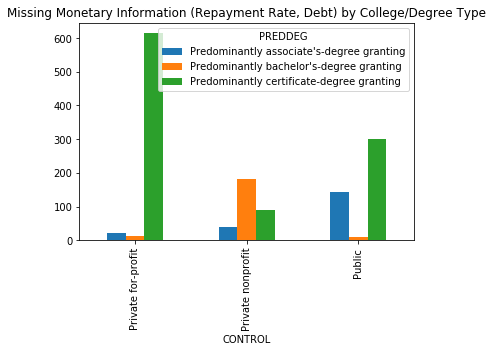

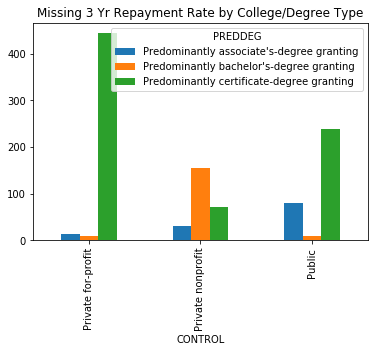

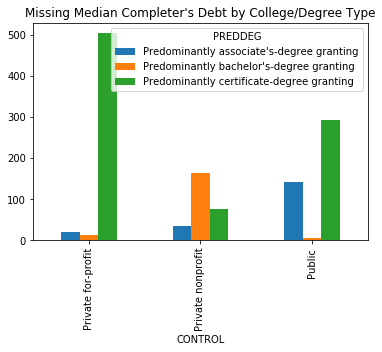

In [14]:
numeric = money_data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

counts = numeric[numeric.isnull().any(axis=1)].replace(trans_dict)
counts = counts.groupby(['CONTROL', 'PREDDEG']).size().unstack()
counts.plot(kind = 'bar').set_title("Missing Monetary Information (Repayment Rate, Debt) by College/Degree Type")

repay = numeric[numeric['RPY_3YR_RT_SUPP'].isnull()].replace(trans_dict)
repay = repay.groupby(['CONTROL', 'PREDDEG']).size().unstack()
repay.plot(kind = 'bar').set_title("Missing 3 Yr Repayment Rate by College/Degree Type")

debt = numeric[numeric['GRAD_DEBT_MDN_SUPP'].isnull()].replace(trans_dict)
debt = debt.groupby(['CONTROL', 'PREDDEG']).size().unstack()
debt.plot(kind = 'bar').set_title("Missing Median Completer's Debt by College/Degree Type")

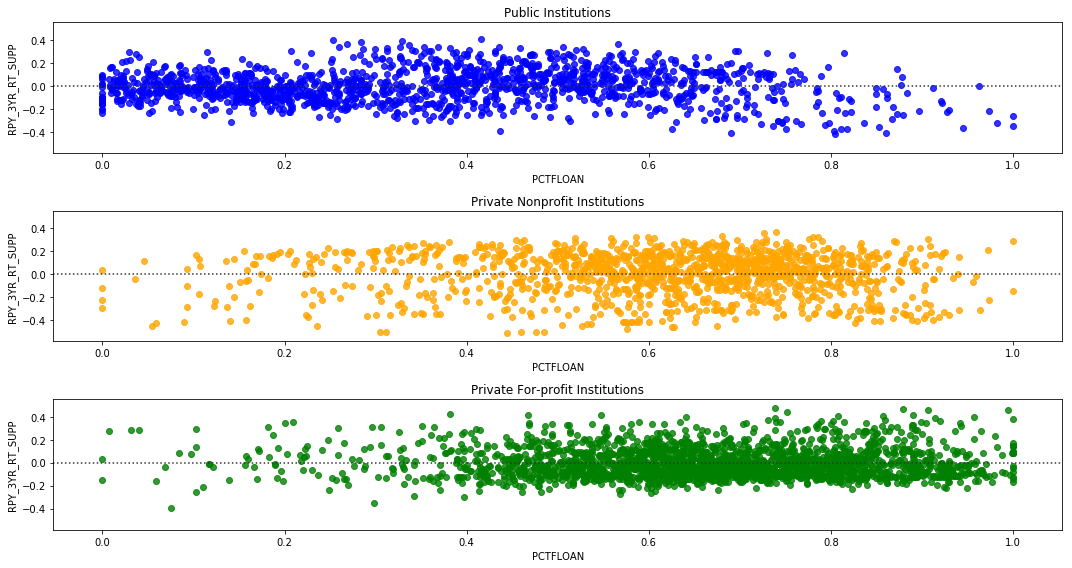

In [15]:
fig, axes = plt.subplots(3, 1, figsize = (15, 8), sharey = True)
sns.residplot(data = nulldescriptions[nulldescriptions['CONTROL'] == 'Public'], x='PCTFLOAN', y='RPY_3YR_RT_SUPP', color='blue', ax = axes[0])
sns.residplot(data = nulldescriptions[nulldescriptions['CONTROL'] == 'Private nonprofit'], x='PCTFLOAN', y='RPY_3YR_RT_SUPP', color='orange', ax = axes[1])
sns.residplot(data = nulldescriptions[nulldescriptions['CONTROL'] == 'Private for-profit'], x='PCTFLOAN', y='RPY_3YR_RT_SUPP', color='green', ax=axes[2])
axes[0].set_title("Public Institutions")
axes[1].set_title("Private Nonprofit Institutions")
axes[2].set_title("Private For-profit Institutions")
fig.tight_layout()

Text(0.5, 1.0, 'Median Debt of Completers (Supressed) vs College Type')

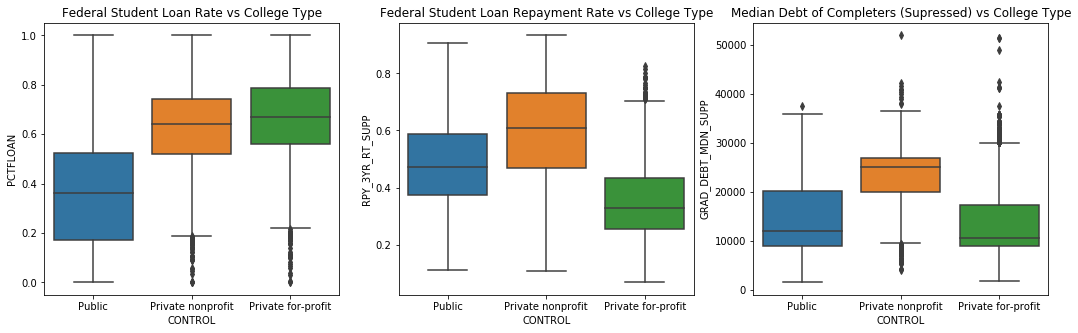

In [16]:
genfig, genaxes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x="CONTROL", y="PCTFLOAN", data= nulldescriptions, ax = genaxes[0])
genaxes[0].set_title("Federal Student Loan Rate vs College Type")
sns.boxplot(x="CONTROL", y="RPY_3YR_RT_SUPP", data= nulldescriptions, ax = genaxes[1])
genaxes[1].set_title("Federal Student Loan Repayment Rate vs College Type")
sns.boxplot(x="CONTROL", y="GRAD_DEBT_MDN_SUPP", data= nulldescriptions, ax = genaxes[2])
genaxes[2].set_title("Median Debt of Completers (Supressed) vs College Type")

Text(0.5, 1.0, 'Median Debt of Completers (Supressed) vs College/Degree Type')

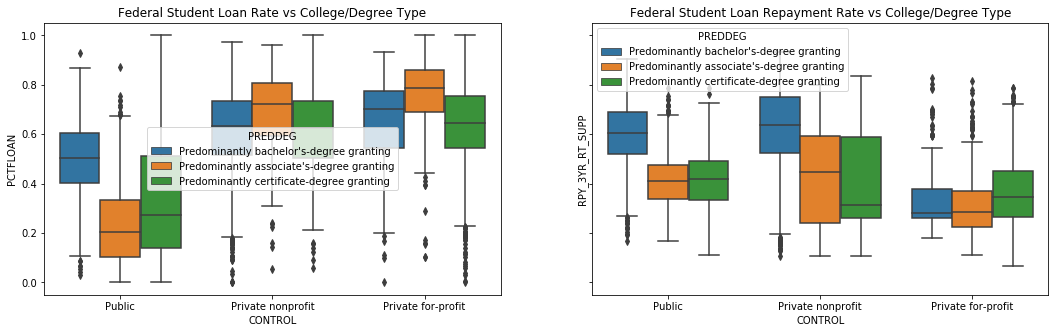

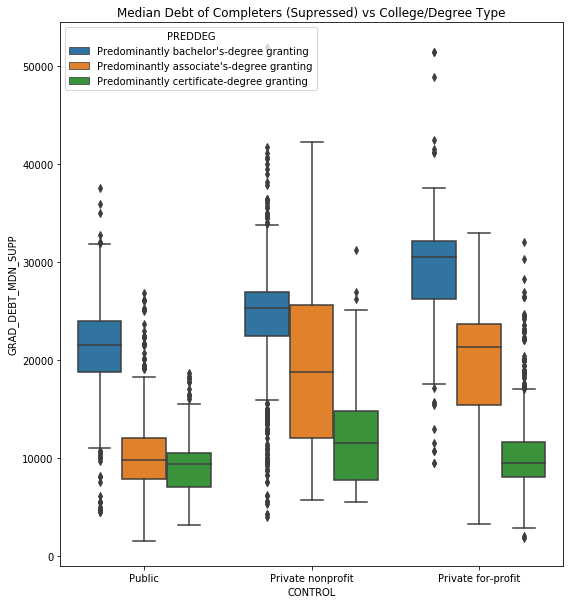

In [18]:
nullfig, nullaxes = plt.subplots(1, 2, figsize=(18, 5), sharey = True)
sns.boxplot(x="CONTROL", y="PCTFLOAN", hue="PREDDEG", data= nulldescriptions, ax = nullaxes[0])
nullaxes[0].set_title("Federal Student Loan Rate vs College/Degree Type")
sns.boxplot(x="CONTROL", y="RPY_3YR_RT_SUPP", hue="PREDDEG", data= nulldescriptions, ax = nullaxes[1])
nullaxes[1].set_title("Federal Student Loan Repayment Rate vs College/Degree Type")

debtfig, debtaxes = plt.subplots(1, 1, figsize=(9, 10))
sns.boxplot(x="CONTROL", y="GRAD_DEBT_MDN_SUPP", hue="PREDDEG", data= nulldescriptions)
debtaxes.set_title("Median Debt of Completers (Supressed) vs College/Degree Type")